In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Additionally added libraries

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
#### Remember to unpack data from .zip folders

In [ ]:
tX.shape

### Code for removing features
#tX_new = np.delete(tX, [11, 12], 1)
#tX = tX_new

Investigating loaded data

In [3]:
tX 

array([[ 138.47 ,   51.655,   97.827, ...,    1.24 ,   -2.475,  113.497],
       [ 160.937,   68.768,  103.235, ..., -999.   , -999.   ,   46.226],
       [-999.   ,  162.172,  125.953, ..., -999.   , -999.   ,   44.251],
       ...,
       [ 105.457,   60.526,   75.839, ..., -999.   , -999.   ,   41.992],
       [  94.951,   19.362,   68.812, ..., -999.   , -999.   ,    0.   ],
       [-999.   ,   72.756,   70.831, ..., -999.   , -999.   ,    0.   ]])

In [4]:
tX[tX==-999] = np.nan
tX

array([[138.47 ,  51.655,  97.827, ...,   1.24 ,  -2.475, 113.497],
       [160.937,  68.768, 103.235, ...,     nan,     nan,  46.226],
       [    nan, 162.172, 125.953, ...,     nan,     nan,  44.251],
       ...,
       [105.457,  60.526,  75.839, ...,     nan,     nan,  41.992],
       [ 94.951,  19.362,  68.812, ...,     nan,     nan,   0.   ],
       [    nan,  72.756,  70.831, ...,     nan,     nan,   0.   ]])

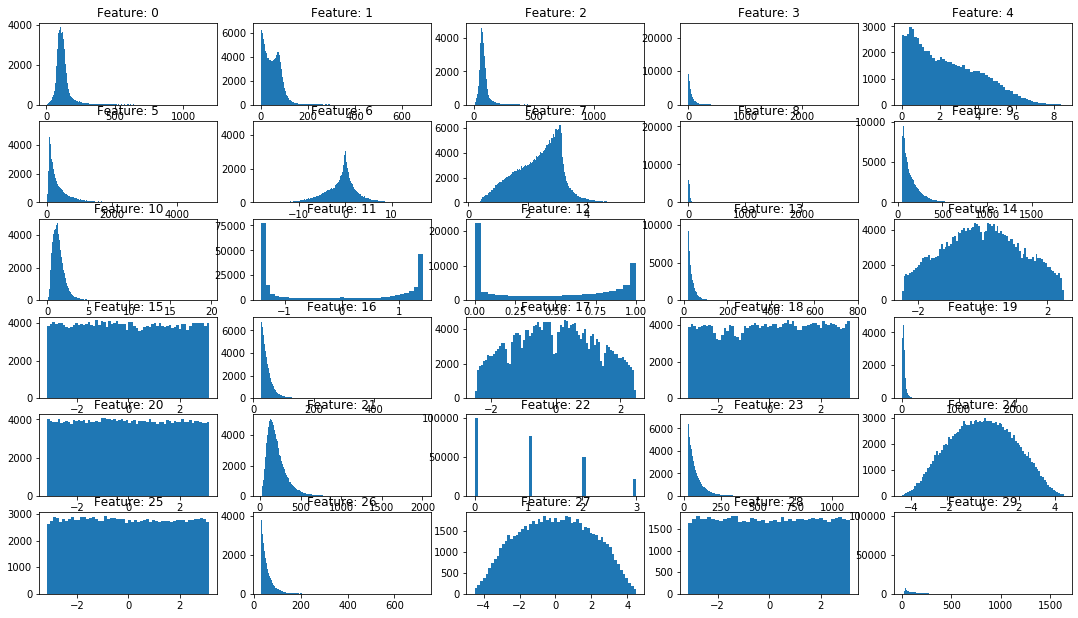

In [5]:
# Histogram tX
nrows = 6
ncols = 5
fig, axes = plt.subplots(nrows, ncols)

feature_id = 0
for row in range(nrows):
    for col in range(ncols):
        feature_tbp  = tX[:,feature_id]
        axes[row, col].hist(feature_tbp[~np.isnan(feature_tbp)], bins='auto')
        axes[row, col].set_title('Feature: {}'.format(feature_id))
        feature_id += 1
    
    
fig.set_size_inches(18.5, 10.5)

List of skewed features: 0, 2, 3, 4, 5, 7, 8, 9, 10, 13, 16, 19, 21, 23, 26, 29

(array([9.9913e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.1500e+03, 9.1970e+03,
        7.6260e+03, 6.3050e+03, 5.4070e+03, 4.6180e+03, 4.0620e+03,
        3.7090e+03, 3.1580e+03, 2.8880e+03, 3.0030e+03, 3.0780e+03,
        3.0290e+03, 2.9090e+03, 2.8810e+03, 2.8410e+03, 2.7340e+03,
        2.6080e+03, 2.5360e+03, 2.4120e+03, 2.5290e+03, 2.3820e+03,
        2.2630e+03, 2.2020e+03, 2.1420e+03, 2.1370e+03, 1.9950e+03,
        1.9500e+03, 1.8400e+03, 1.8200e+03, 1.7570e+03, 1.6900e+03,
        1.7740e+03, 1.5800e+03, 1.5370e+03, 1.4150e+03, 1.4430e+03,
        1.4330e+03, 1.2770e+03, 1.3120e+03, 1.2380e+03, 1.2020e+03,
        1.1370e+03, 1.0980e+03, 1.1010e+03, 1.0400e+03, 9.7700e+02,
        1.0030e+03, 9.2800e+02, 8.8900e+02, 8.6800e+02, 8.3100e+02,
        8.0700e+02, 7.7700e+02, 7.3500e+02, 7.1000e+02, 6.9900e+02,
        6.5800e+02, 6.6500e+02, 5.9100e+02, 5.8000e+02, 5.9600e+02,
        5.3000e+02, 4.8000e+02, 4.8500e+02, 4.89

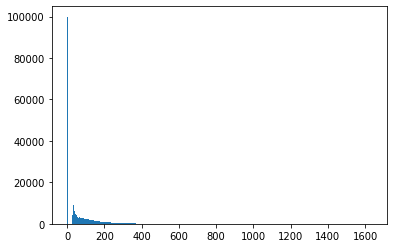

In [6]:
## Histogram last feature to show how problematic 0's are in this feature. 
plt.hist(tX[:,29], bins='auto')

In [7]:
# Numerical exploratory data analysis
# row1: mean | row2: variance | row3: standard deviation | row4: minimum value | row5: maximum value | row6: number of NaN's
feature_details = np.zeros([7, tX.shape[1]])
for i in range(tX.shape[1]):
    feature_details[0, i] = np.nanmean(tX[:,i])
    feature_details[1, i] = np.nanvar(tX[:,i])
    feature_details[2, i] = np.nanstd(tX[:,i])
    feature_details[3, i] = np.nanmin(tX[:,i])
    feature_details[4, i] = np.nanmax(tX[:,i])
    feature_details[5, i] = np.isnan(tX[:,i]).sum()
    feature_details[6, i] = np.nanmedian(tX[:,i])
#print(feature_details)

In [8]:
# Show amount of nans
print(feature_details[5,:])

[ 38114.      0.      0.      0. 177457. 177457. 177457.      0.      0.
      0.      0.      0. 177457.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.  99913.  99913.  99913. 177457.
 177457. 177457.      0.]


In [9]:
# Importing pandas just to make this numerical EDA nicer to view. 
# IMPORTANT!!! DO NOT USE IN PROJECT SUBMISSION
import pandas as pd
df = pd.DataFrame(feature_details)
df.index = ['Mean', 'Variance', 'Std', 'min', 'max', 'n-NaNs', 'median']
df.index.name = 'Statistics'
df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Statistics,,,,,,,,,,,,,,,,,,,,,
Mean,121.858528,49.239819,81.181982,57.895962,2.403735,371.783360,-0.821688,2.373100,18.917332,158.432217,...,-0.010119,209.797178,0.979176,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,73.064591
Variance,3283.063262,1249.255942,1666.975303,4052.029594,3.035311,158162.573194,12.847474,0.612947,496.106539,13387.851528,...,3.284138,16002.060938,0.955358,3679.887218,3.184583,3.288345,1023.076126,4.127921,3.301261,9607.031571
Std,57.298021,35.344815,40.828609,63.655554,1.742214,397.696584,3.584337,0.782910,22.273449,115.705884,...,1.812219,126.499253,0.977424,60.662074,1.784540,1.813379,31.985561,2.031729,1.816937,98.015466
min,9.044000,0.000000,6.329000,0.000000,0.000000,13.602000,-18.066000,0.208000,0.000000,46.104000,...,-3.142000,13.678000,0.000000,30.000000,-4.499000,-3.142000,30.000000,-4.500000,-3.142000,0.000000
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,...,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000
n-NaNs,38114.000000,0.000000,0.000000,0.000000,177457.000000,177457.000000,177457.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,99913.000000,99913.000000,99913.000000,177457.000000,177457.000000,177457.000000,0.000000
median,112.406000,46.524000,73.752000,38.467500,2.107000,225.885000,-0.244000,2.491500,12.315500,120.664500,...,-0.024000,179.739000,1.000000,65.561000,0.000000,-0.033000,47.902000,-0.010000,-0.002000,40.512500


In [10]:
# store mean and variance
feature_mean = feature_details[0, :]
feature_std = feature_details[2, :]
feature_median = feature_details[6, :]

In [11]:
#Replace NaN's with median values
from clean_nan import *

tX_nan_replaced = clean_nan(tX, feature_median)
view_data_nicely = pd.DataFrame(tX_nan_replaced)
view_data_nicely

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2.0,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,2.107,225.885,-0.244,3.473,2.078,125.157,...,-1.916,164.546,1.0,46.226,0.725,1.158,47.902,-0.01,-0.002,46.226
2,112.406,162.172,125.953,35.635,2.107,225.885,-0.244,3.148,9.336,197.814,...,-2.186,260.414,1.0,44.251,2.053,-2.028,47.902,-0.01,-0.002,44.251
3,143.905,81.417,80.943,0.414,2.107,225.885,-0.244,3.310,0.414,75.968,...,0.060,86.062,0.0,65.561,0.000,-0.033,47.902,-0.01,-0.002,0.000
4,175.864,16.915,134.805,16.405,2.107,225.885,-0.244,3.891,16.405,57.983,...,-0.871,53.131,0.0,65.561,0.000,-0.033,47.902,-0.01,-0.002,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,112.406,71.989,36.548,5.042,2.107,225.885,-0.244,1.392,5.042,55.892,...,2.859,144.665,0.0,65.561,0.000,-0.033,47.902,-0.01,-0.002,0.000
249996,112.406,58.179,68.083,22.439,2.107,225.885,-0.244,2.585,22.439,50.618,...,-0.867,80.408,0.0,65.561,0.000,-0.033,47.902,-0.01,-0.002,0.000
249997,105.457,60.526,75.839,39.757,2.107,225.885,-0.244,2.390,22.183,120.462,...,-2.890,198.907,1.0,41.992,1.800,-0.166,47.902,-0.01,-0.002,41.992
249998,94.951,19.362,68.812,13.504,2.107,225.885,-0.244,3.365,13.504,55.859,...,0.811,112.718,0.0,65.561,0.000,-0.033,47.902,-0.01,-0.002,0.000


In [14]:
skewed_features = [0, 2, 3, 4, 5, 7, 8, 9, 10, 13, 16, 19, 21, 23, 26, 29]
#skewed_features = [0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 14, 17, 19, 21, 24, 27]

# Print number of 0's for each feature. For Feature 29 (last two outputs)
# You can clearly see how many 0 values is in that dataset. Should be NaN
# and replaced with median so that the regression actually fits to the distribution
for skew in skewed_features:
    if (tX_nan_replaced[:,skew] == 0).any():
        print(skew)
        print((tX_nan_replaced[:,skew] == 0).sum())

3
41
4
6
8
39
29
99913


In [16]:
from data_wrangling import shift_zeros

## Replaces 0 with 0.0005 in order to avoid log(0)
tX_noZero = shift_zeros(tX_nan_replaced, skewed_features, 0.0005)

view_data_nicely = pd.DataFrame(tX_noZero)
view_data_nicely

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2.0,67.435,2.150,0.444,46.062,1.24,-2.475,113.4970
1,160.937,68.768,103.235,48.146,2.107,225.885,-0.244,3.473,2.078,125.157,...,-1.916,164.546,1.0,46.226,0.725,1.158,47.902,-0.01,-0.002,46.2260
2,112.406,162.172,125.953,35.635,2.107,225.885,-0.244,3.148,9.336,197.814,...,-2.186,260.414,1.0,44.251,2.053,-2.028,47.902,-0.01,-0.002,44.2510
3,143.905,81.417,80.943,0.414,2.107,225.885,-0.244,3.310,0.414,75.968,...,0.060,86.062,0.0,65.561,0.000,-0.033,47.902,-0.01,-0.002,0.0005
4,175.864,16.915,134.805,16.405,2.107,225.885,-0.244,3.891,16.405,57.983,...,-0.871,53.131,0.0,65.561,0.000,-0.033,47.902,-0.01,-0.002,0.0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,112.406,71.989,36.548,5.042,2.107,225.885,-0.244,1.392,5.042,55.892,...,2.859,144.665,0.0,65.561,0.000,-0.033,47.902,-0.01,-0.002,0.0005
249996,112.406,58.179,68.083,22.439,2.107,225.885,-0.244,2.585,22.439,50.618,...,-0.867,80.408,0.0,65.561,0.000,-0.033,47.902,-0.01,-0.002,0.0005
249997,105.457,60.526,75.839,39.757,2.107,225.885,-0.244,2.390,22.183,120.462,...,-2.890,198.907,1.0,41.992,1.800,-0.166,47.902,-0.01,-0.002,41.9920
249998,94.951,19.362,68.812,13.504,2.107,225.885,-0.244,3.365,13.504,55.859,...,0.811,112.718,0.0,65.561,0.000,-0.033,47.902,-0.01,-0.002,0.0005


In [19]:
from data_wrangling import log_transform

tX_logged = log_transform(tX_noZero, skewed_features)

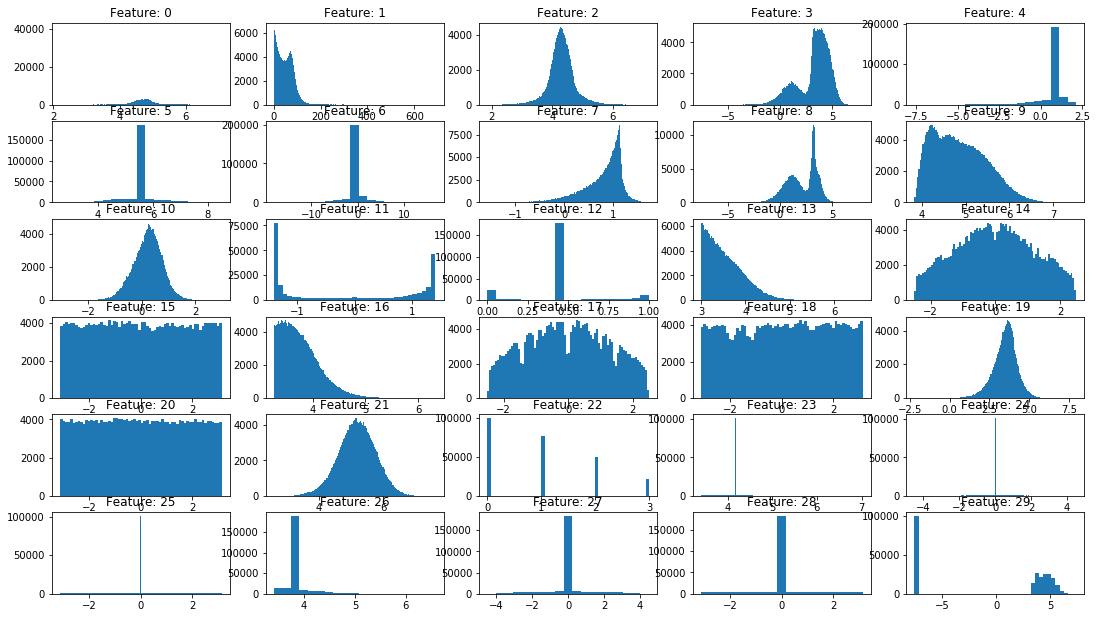

In [20]:
nrows = 6
ncols = 5
fig, axes = plt.subplots(nrows, ncols)

feature_id = 0
for row in range(nrows):
    for col in range(ncols):
        feature_tbp  = tX_logged[:,feature_id]
        axes[row, col].hist(feature_tbp[~np.isnan(feature_tbp)], bins='auto')
        axes[row, col].set_title('Feature: {}'.format(feature_id))
        feature_id += 1
    
    
fig.set_size_inches(18.5, 10.5)

We have to standardize dataset - a wide variety of ranges can be observed in the dataset. Would lead to a biased learning algorithm

In [23]:
# create standardized dataset
#should be put into a method
tx_ = tX_logged.copy()
for i in range(tX_logged.shape[1]):
    if (i!=22):
        tX_[:,i] = (tX_[:,i] - feature_mean[i])/feature_std[i]

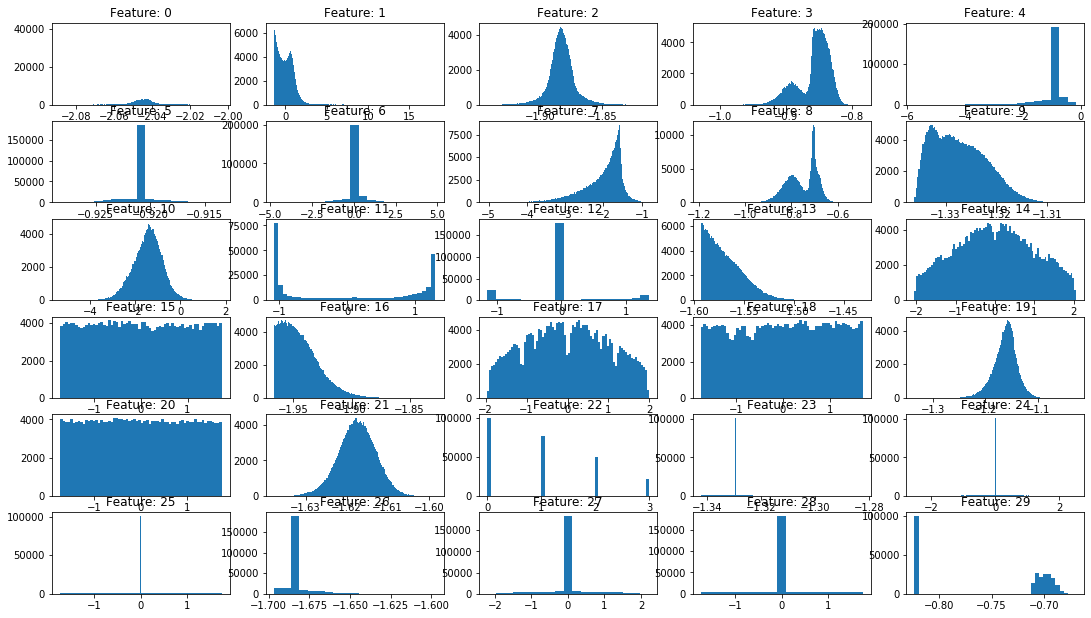

In [24]:
nrows = 6
ncols = 5
fig, axes = plt.subplots(nrows, ncols)

feature_id = 0
for row in range(nrows):
    for col in range(ncols):
        feature_tbp  = tX_[:,feature_id]
        axes[row, col].hist(feature_tbp[~np.isnan(feature_tbp)], bins='auto')
        axes[row, col].set_title('Feature: {}'.format(feature_id))
        feature_id += 1
    
    
fig.set_size_inches(18.5, 10.5)

In [26]:
view_data_nicely = pd.DataFrame(tx_)
view_data_nicely

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-2.040697,0.068332,-1.876106,-0.857183,-1.433834,-0.922707,0.973036,-1.600924,-0.681591,-1.323573,...,-0.147267,-1.614566,2.0,-1.328852,1.206627,0.251681,-1.683556,0.616148,-1.361312,-0.697164
1,-2.038072,0.552505,-1.874788,-0.848657,-0.951932,-0.921213,0.161170,-1.440883,-0.816485,-1.327527,...,-1.051683,-1.618144,1.0,-1.335077,0.408102,0.645421,-1.682331,0.000908,-0.000230,-0.706328
2,-2.044336,3.195156,-1.869916,-0.853384,-0.951932,-0.921213,0.161170,-1.566378,-0.749029,-1.323570,...,-1.200672,-1.614515,1.0,-1.335797,1.152271,-1.111520,-1.682331,0.000908,-0.000230,-0.706773
3,-2.040025,0.910379,-1.880746,-0.923373,-0.951932,-0.921213,0.161170,-1.502283,-0.888916,-1.331842,...,0.038692,-1.623267,0.0,-1.329317,0.001835,-0.011364,-1.682331,0.000908,-0.000230,-0.822987
4,-2.036524,-0.914556,-1.868253,-0.865571,-0.951932,-0.921213,0.161170,-1.295723,-0.723720,-1.334176,...,-0.475042,-1.627080,0.0,-1.329317,0.001835,-0.011364,-1.682331,0.000908,-0.000230,-0.822987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,-2.044336,0.643636,-1.900220,-0.884104,-0.951932,-0.921213,0.161170,-2.608677,-0.776688,-1.334494,...,1.583208,-1.619162,0.0,-1.329317,0.001835,-0.011364,-1.682331,0.000908,-0.000230,-0.822987
249996,-2.044336,0.252913,-1.884984,-0.860650,-0.951932,-0.921213,0.161170,-1.818057,-0.709658,-1.335351,...,-0.472835,-1.623805,0.0,-1.329317,0.001835,-0.011364,-1.682331,0.000908,-0.000230,-0.822987
249997,-2.045450,0.319316,-1.882341,-0.851664,-0.951932,-0.921213,0.161170,-1.918238,-0.710173,-1.327857,...,-1.589146,-1.616645,1.0,-1.336661,1.010498,-0.084708,-1.682331,0.000908,-0.000230,-0.707308
249998,-2.047281,-0.845324,-1.884723,-0.868628,-0.951932,-0.921213,0.161170,-1.481234,-0.732457,-1.334499,...,0.453102,-1.621134,0.0,-1.329317,0.001835,-0.011364,-1.682331,0.000908,-0.000230,-0.822987


In [ ]:
# Saving arrays to .py file. Can easily be loaded with np.load('path' + 'filename')
####np.save('tX_cleaned', tX)
####np.save('tX_standardized', tX_standardized)
# Commented this section out to prevent overwriting of dataset

## Do your thing crazy machine learning thing here :) ...

### Linear regression using gradient descent

In [ ]:
#from least_squares_GD import *
from costs import compute_mse
from least_squares_GD import *
from parameter_tuning import gamma_tuning_SGD
from parameter_tuning import gamma_tuning_GD

# Initialization of the weights
initial_w = np.zeros(tx_.shape[1])

# Define the parameters necessary for gradient descent: need to tune gamma. 
# we use the gamma_tuning_SGD for less costly tuning
max_iters = 50
gamma = gamma_tuning_GD(y, tx_, initial_w, max_iters)

w1, loss1 = least_squares_GD(y, tx_, initial_w, max_iters, gamma)
#print(w1)
#print(loss1)

"""w1_ = w1.copy()
print(w1_)
for i in range(len(w1)):
    w1_[i] = w1_[i]*feature_std[i] +  feature_mean[i]
    """

In [ ]:
print(loss1)

### Least squares with SGD

In [ ]:
from least_squares_SGD import *
#No need to re-tune gamma BUT NOT SURE
#Here batch_size is set at 1


# Initialization of the weights BUT we could use w1 as a start AND careful with tuning
initial_w = np.zeros(tx_.shape[1])
gamma = gamma_tuning_GD(y, tx_, initial_w, max_iters)

w2, loss2 = least_squares_SGD(y, tx_, initial_w, 1, max_iters, gamma)
#print(w2)
print(loss2)
w2_ = w2.copy()
print(w1_)
for i in range(len(w2)):
    w2_[i] = w2_[i]*feature_std[i] +  feature_mean[i]

### Least Squares using Normal Equations

In [ ]:
from least_squares import *
from build_polynomial import *
from parameter_tuning import degree_tuning_LS

# degree = degree_tuning_LS(y , tx_)
# Initialization of the weights BUT could use w2
initial_w = np.zeros(tx_.shape[1]) 

#poly_x = build_poly(tx_, degree)

w3, loss3 = least_squares(y, tx_)
#_, loss3_expand = least_squares(y, poly_x)
print(loss3)
#print(loss3_expand)

"""w3_ = w3.copy()
for i in range(len(w3)):
    w3_[i] = w3_[i]*feature_std[i] +  feature_mean[i]
    """

### Ridge regression

In [ ]:
from ridge_regression import *
from parameter_tuning import lambda_tuning_ridge

# Tuning of lambda
lambda_ = lambda_tuning_ridge(y, tx_)

#lambda_ = 0
print(lambda_)

# Computing the loss
w4, loss4 = ridge_regression(y, tx_, lambda_)
print(w4)
print(loss4)
#print(loss4)
#w4_ = w4.copy()
#for i in range(len(w4)):
#    w4_[i] = w4_[i]*feature_std[i] +  feature_mean[i]

In [ ]:
w4, loss4 = ridge_regression(y, tx_, 0)
print(w4)
print(loss4)

In [ ]:
lambda_2 = 0.1*2*tx_.shape[0]

np.isnan(tx_).any()

#w = np.linalg.solve(tx_.T@tx_+lambda_2*np.identity(tx_.shape[1]), tx_.T@y)
#w

In [ ]:
lambda_tuning_ridge(y, tx_)

### Logistic Regression

In [ ]:
from logistic_regression import *
from parameter_tuning import gamma_tuning_log

# Initialization of the weights BUT could use w2
initial_w = np.zeros(tx_.shape[1])
# Tuning of gamma
#gamma = gamma_tuning_log(y, tx_, initial_w, max_iters)
gamma=0.0000000000000001
w5, loss5 = logistic_regression(y, tx_, initial_w, max_iters, gamma)
print(w5)
print(loss5)
w5_ = w5.copy()
for i in range(len(w5)):
    w5_[i] = w5_[i]*feature_std[i] +  feature_mean[i]

### Unstandardize the weights

# Predictions

In [ ]:
## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)


In [ ]:
pretty_view = pd.DataFrame(tX_test)
pretty_view

In [ ]:
# STANDARDIZE TX TEST

### replace -999 with nans and calculate mean pluss std
tX_test[tX_test==-999] = np.nan

test_mean = np.zeros(tX_test.shape[1]).T
test_std = np.zeros(tX_test.shape[1]).T
test_median = np.zeros(tX_test.shape[1]).T

for i in range(tX_test.shape[1]):
    test_mean[i] = np.nanmean(tX_test[:,i])
    test_std[i] = np.nanstd(tX_test[:,i])
    test_median[i] = np.nanmedian(tX_test[:,i])
    
### replace NaN's, shift zeroes and log transform data
tX_test_nan_replaced = clean_nan(tX_test, test_median)
tX_test_noZero = shift_zeros(tX_test_nan_replaced, skewed_features, 0.0005)
tX_test_logged = log_transform(tX_test_noZero, skewed_features)

# Standardize
for i in range(tX_test_logged.shape[1]):
    if (i!=22):
        tX_test_logged[:,i] = (tX_test_logged[:,i] - test_mean[i])/test_std[i]

In [ ]:
pretty_view = pd.DataFrame(tX_test_logged)
pretty_view

In [ ]:
OUTPUT_PATH = '../data/sample-submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(w4, tX_test_logged) # CAREFUL IT'S W3
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [ ]:
weights = w2

In [ ]:
OUTPUT_PATH = '../data/sample-submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)